In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import boxcox
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [94]:
data=pd.read_csv('heart.csv')

In [95]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [96]:
data.shape

(1025, 14)

In [97]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [98]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [99]:
#dataset is clean and has no missing values

In [100]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

### dataset is balanced

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [102]:
print("DataFrame Columns:")
print(data.columns)



DataFrame Columns:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [103]:
#All data are numerical

In [104]:
#let's transform categorical values into dummies/Convert categorical variable into dummy/indicator variables.

data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


In [105]:
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
1021,60,125,258,141,2.8,0,False,True,True,False,...,False,False,True,False,False,False,False,False,False,True
1022,47,110,275,118,1.0,0,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
1023,50,110,254,159,0.0,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [106]:
# Filter out continuous features for the univariate analysis
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_continuous = data[continuous_features]
categorical_features = data.columns.difference(continuous_features)
df_categorical = data[categorical_features]
print("\nCategorical Features List:")
print(categorical_features)


Categorical Features List:
Index(['ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'exang_0', 'exang_1', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1',
       'restecg_2', 'sex_0', 'sex_1', 'slope_0', 'slope_1', 'slope_2',
       'target', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')


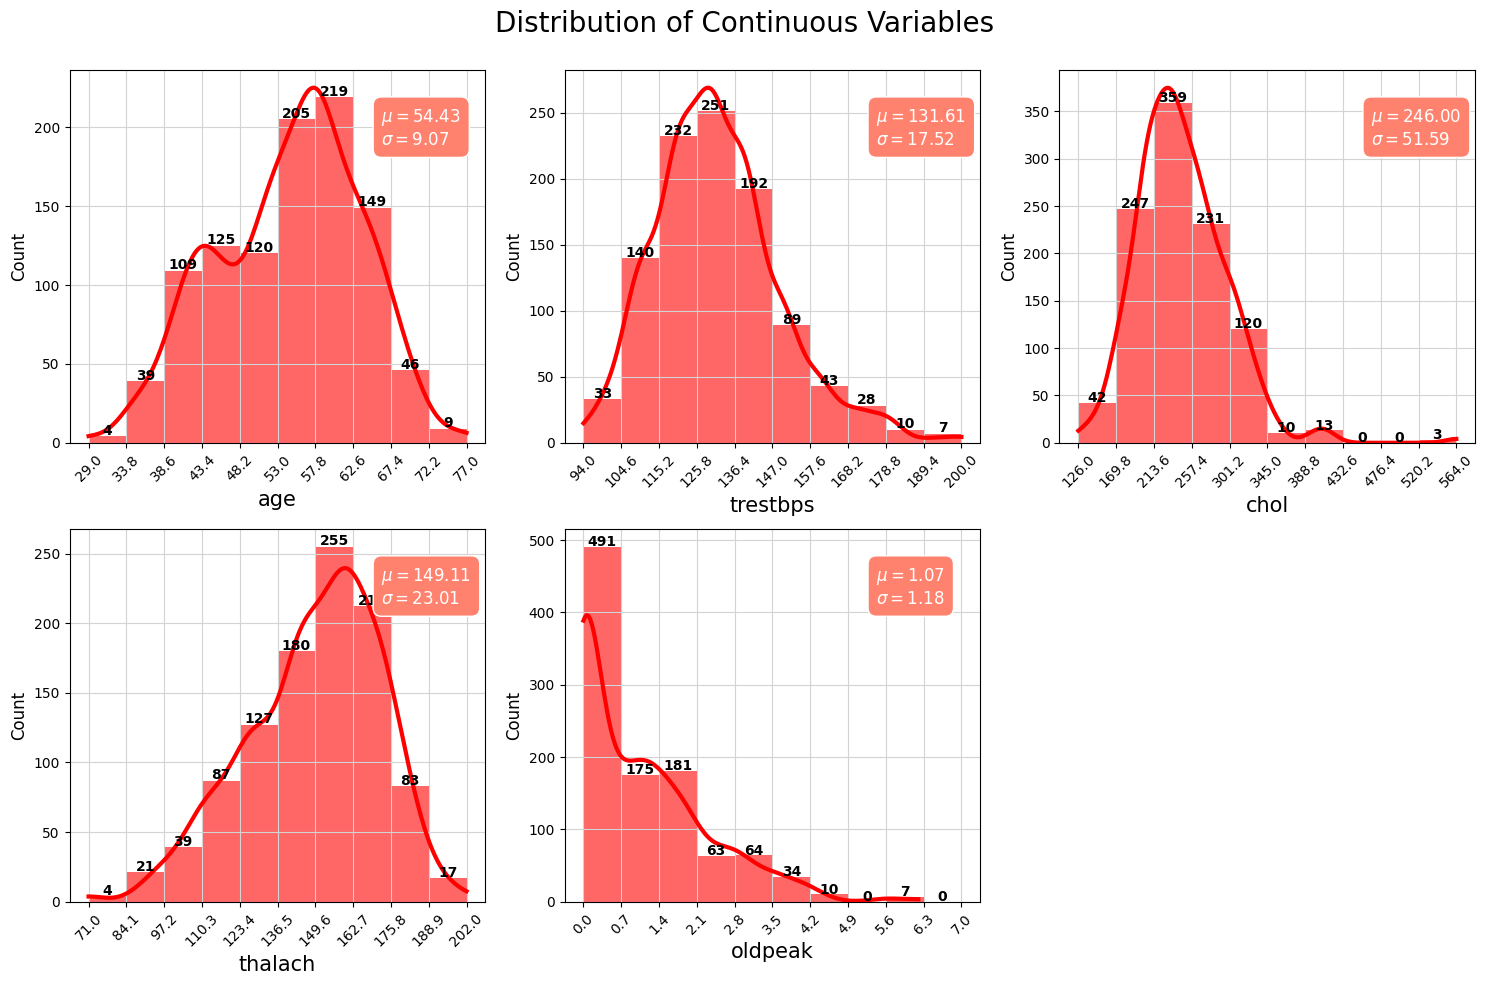

In [107]:


# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [108]:
categorical_features = data.columns.difference(continuous_features)
df_categorical = data[categorical_features]

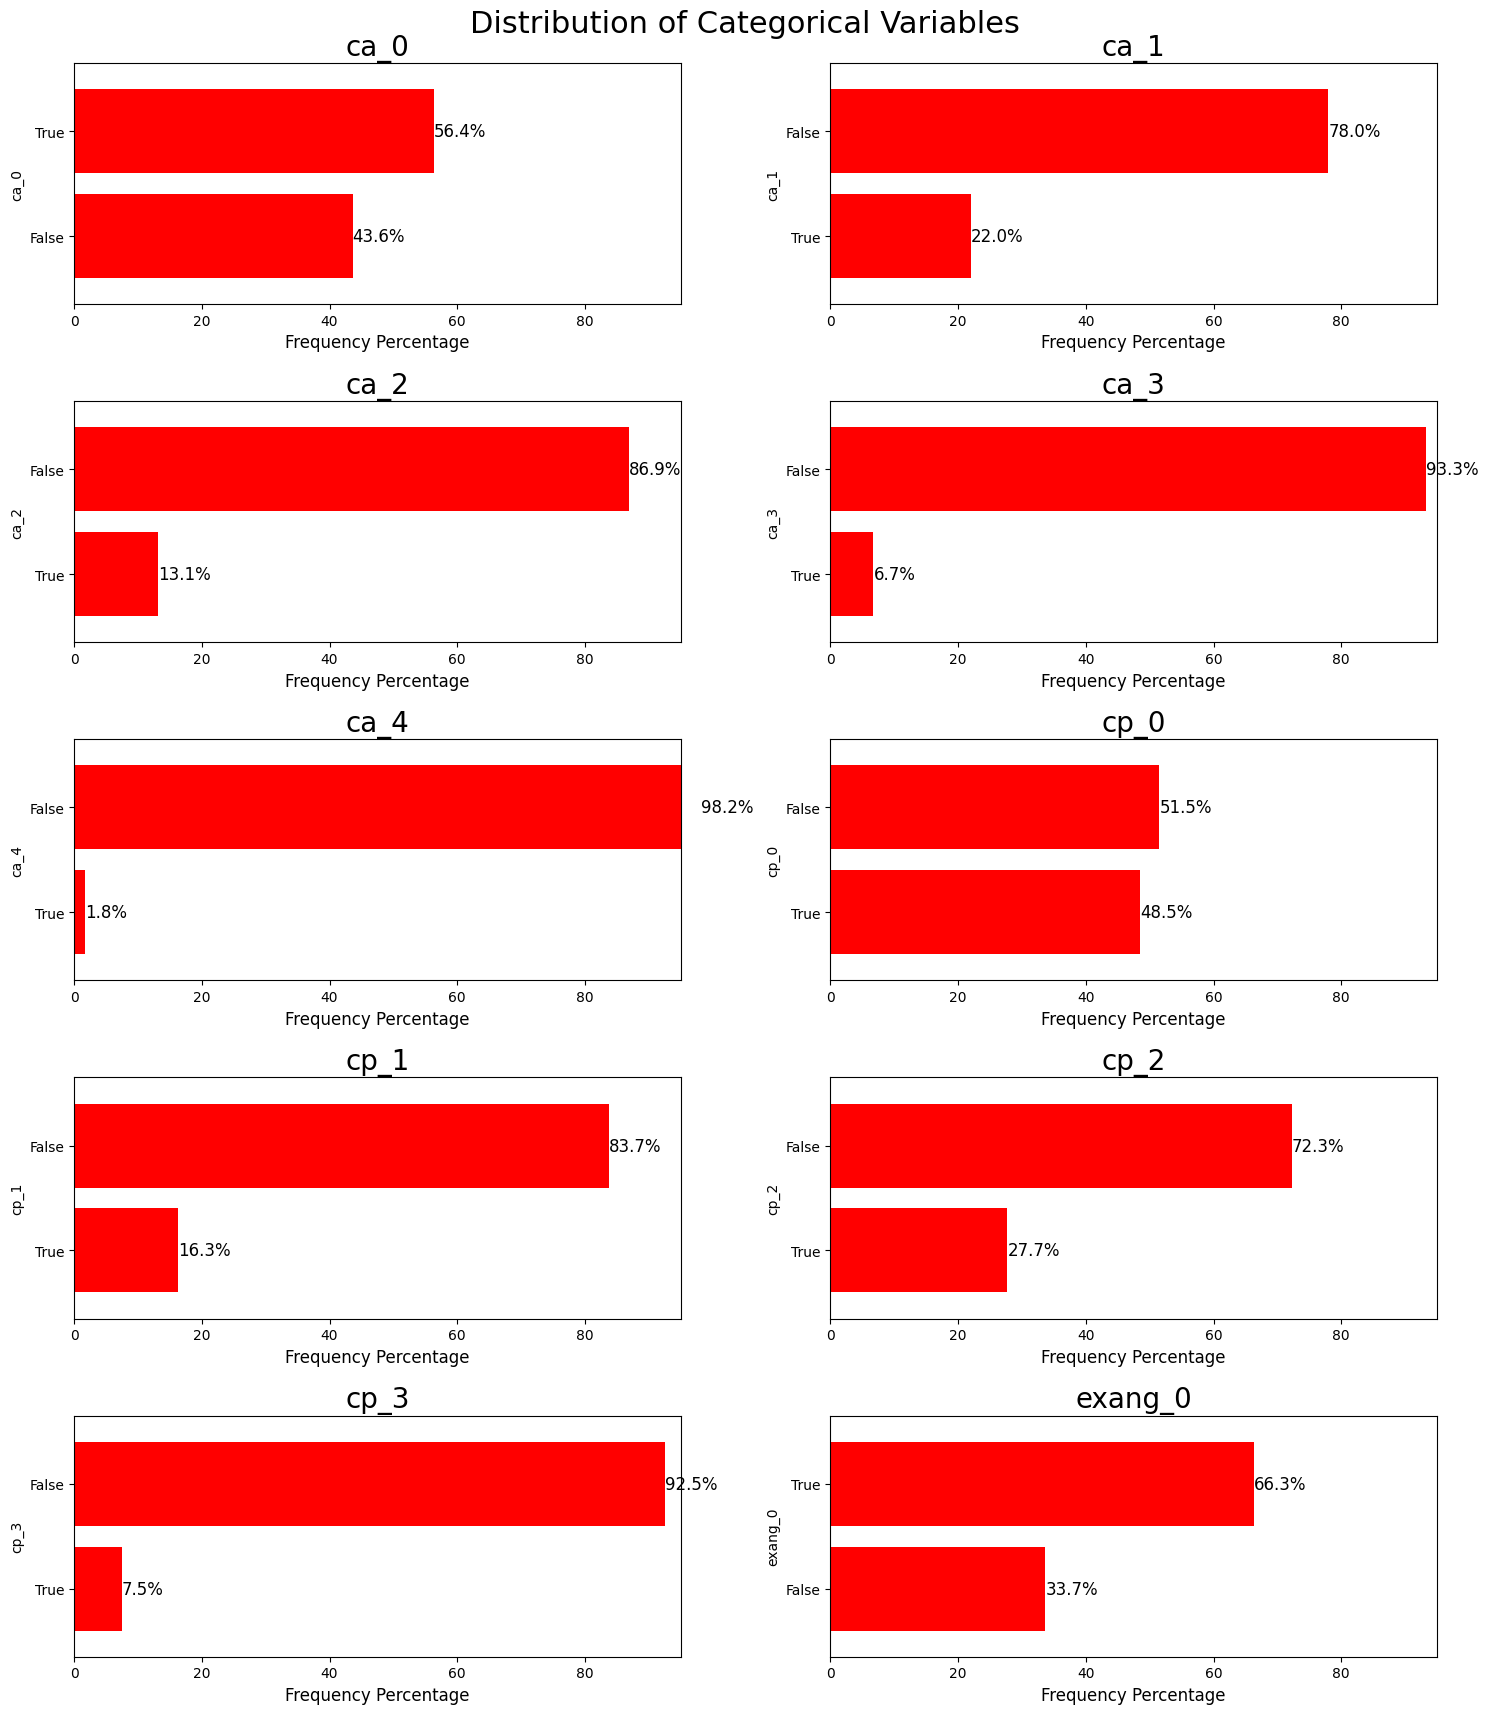

In [109]:
# Filter out continuous features for the univariate analysis
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_continuous = data[continuous_features]
categorical_features = data.columns.difference(continuous_features)
df_categorical = data[categorical_features]
feature_titles = {
    'ca_0': 'Major Blood Vessel 0',
    'ca_1': 'Major Blood Vessel 1',
    'ca_2': 'Major Blood Vessel 2',
    'ca_3': 'Major Blood Vessel 3',
    'ca_4': 'Major Blood Vessel 4',
    'cp_0': 'Typical Angina',
    'cp_1': 'Atypical Angina',
    'cp_2': 'Non-anginal Pain',
    'cp_3': 'Asymptomatic',
    'exang_0': 'No Exercise-induced Angina',
    'exang_1': 'Exercise-induced Angina',
    'thalach': 'Maximum Heart Rate Achieved',
    # Add mappings for other features as needed
}

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 5x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart if there's a subplot available
    if row < 5 and col_idx < 2:
        value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
        
        # Add frequency percentages to the bars
        for index, value in enumerate(value_counts):
            ax[row, col_idx].text(value, index, f'{value:.1f}%', fontsize=12, ha='left', va='center')
        
        ax[row, col_idx].set_xlim([0, 95])
        ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
        ax[row, col_idx].set_title(f'{col}', fontsize=20)

# Hide the empty subplots
for i in range(len(categorical_features), 5*2):
    row = i // 2
    col_idx = i % 2
    ax[row, col_idx].axis('off')

# Add the main title
plt.suptitle('Distribution of Categorical Variables', fontsize=22)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(top=0.95)
plt.show()


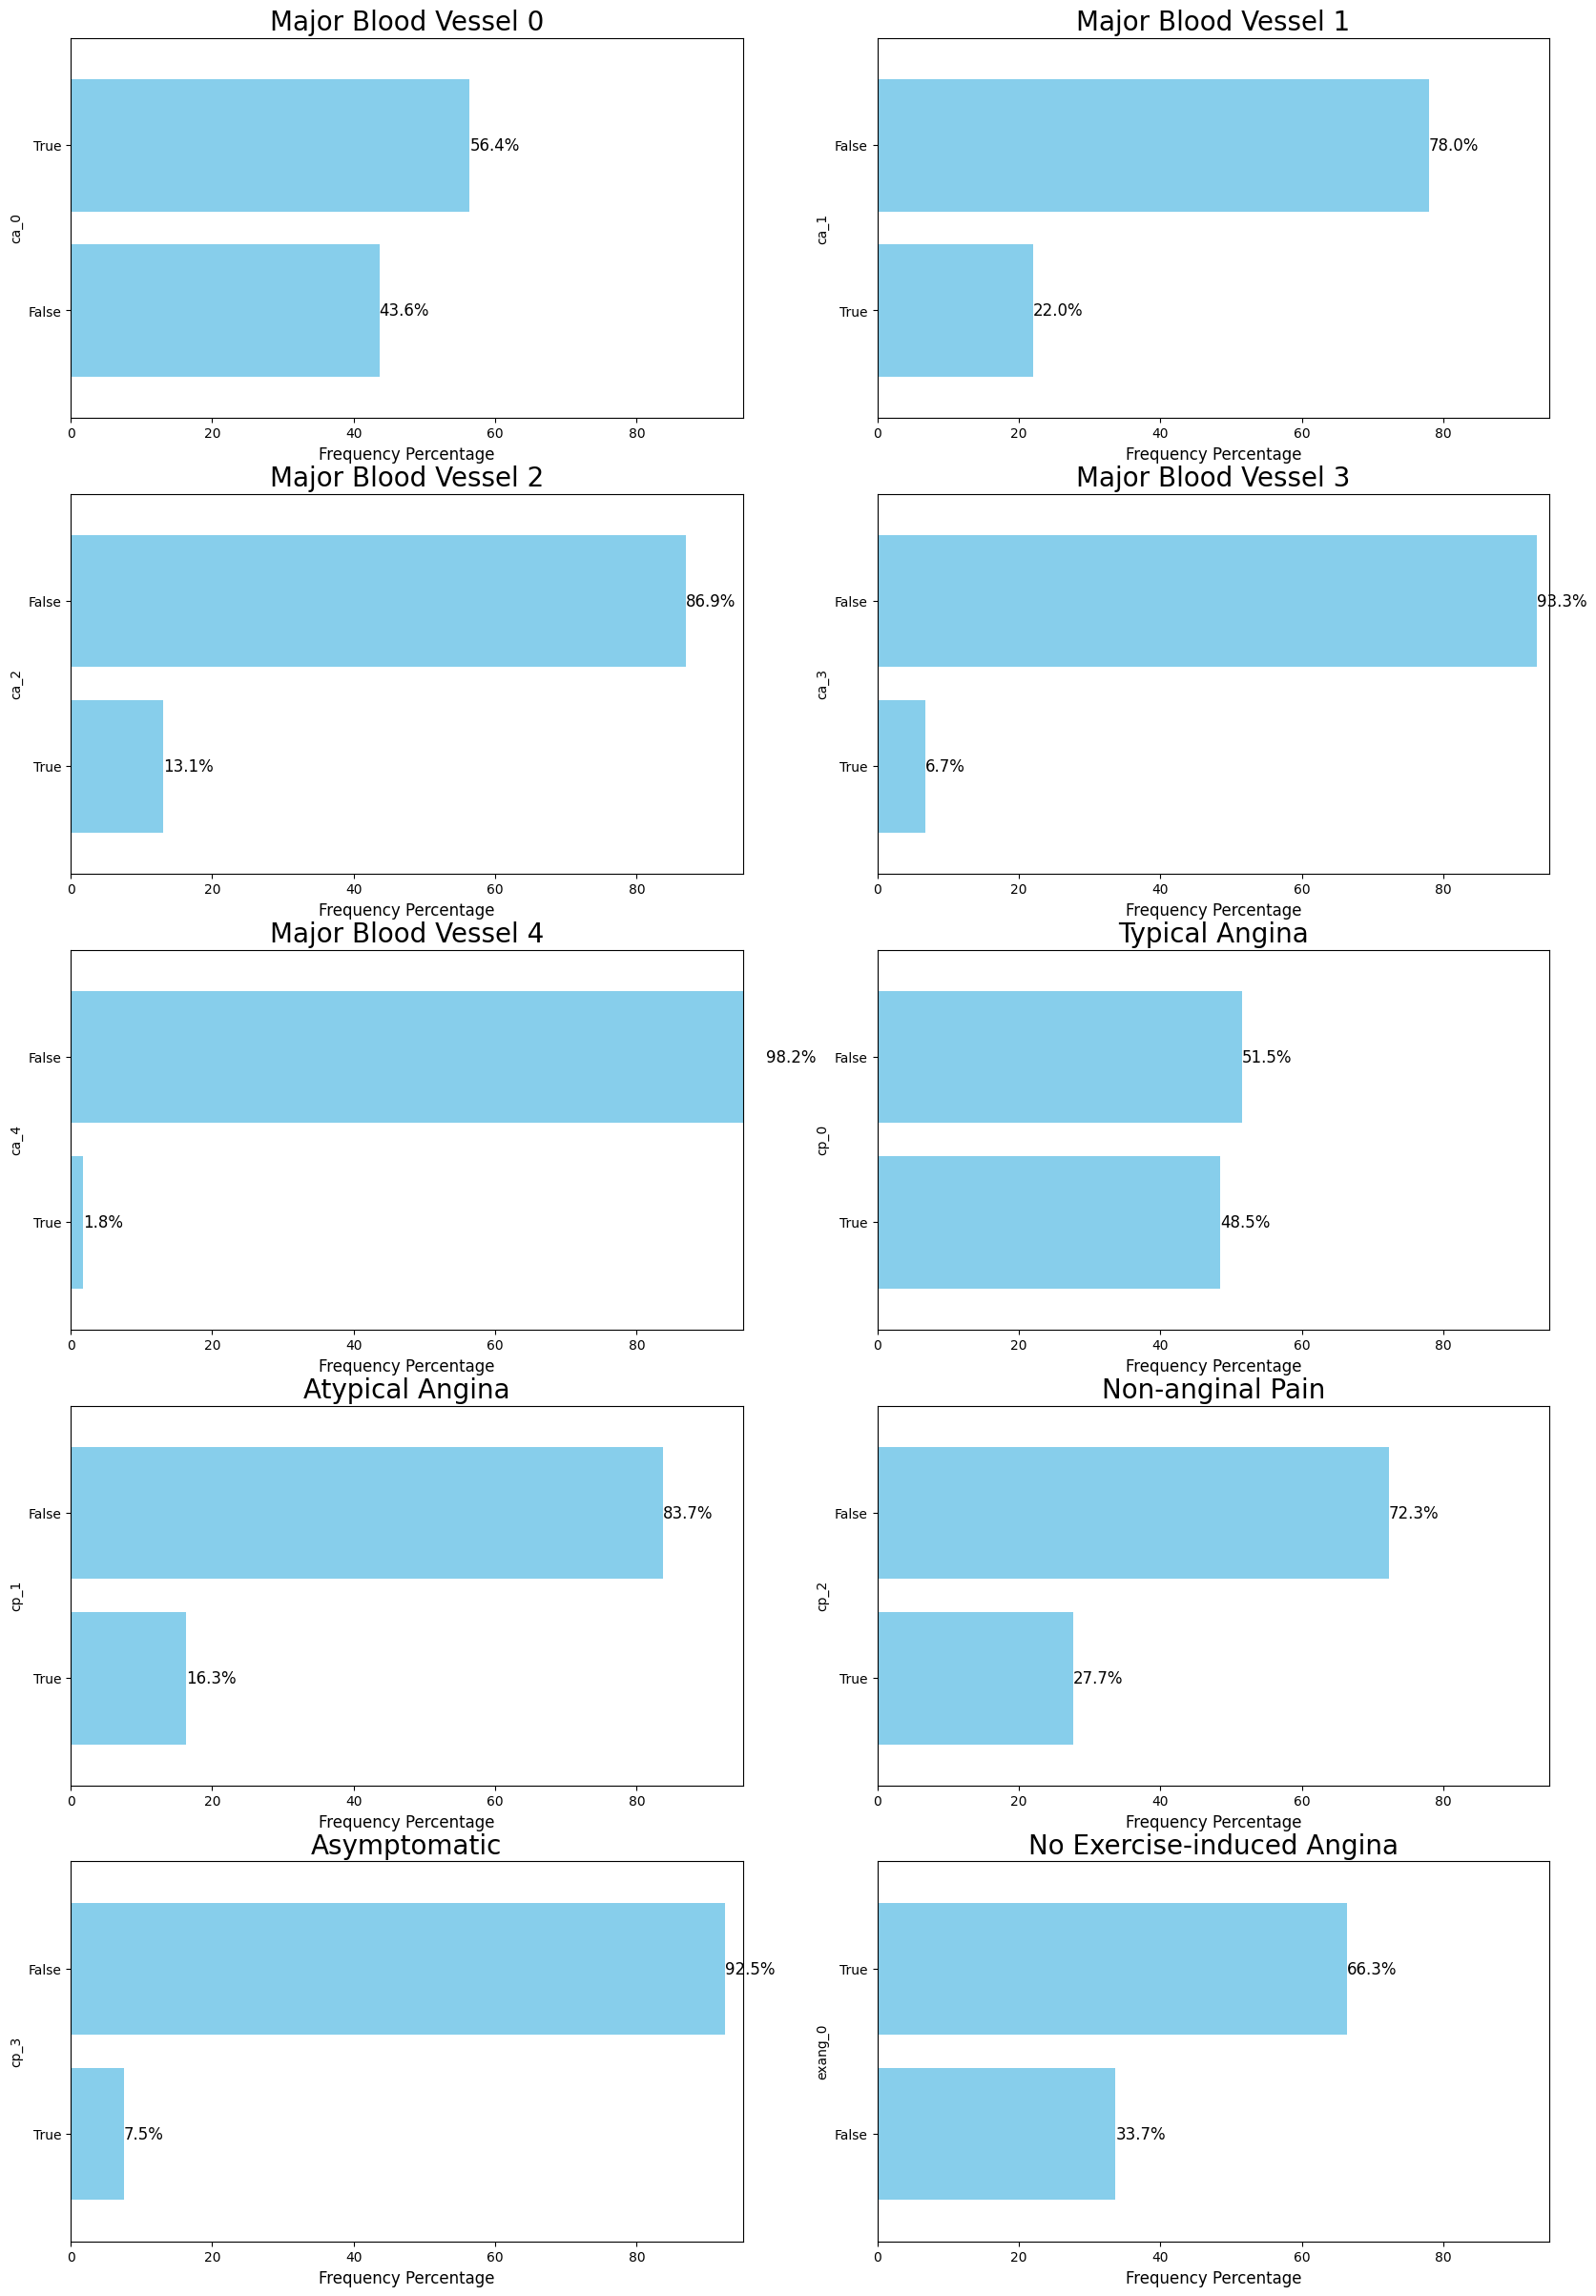

In [110]:
# Define a dictionary mapping original feature names to user-friendly titles
feature_titles = {
    'ca_0': 'Major Blood Vessel 0',
    'ca_1': 'Major Blood Vessel 1',
    'ca_2': 'Major Blood Vessel 2',
    'ca_3': 'Major Blood Vessel 3',
    'ca_4': 'Major Blood Vessel 4',
    'cp_0': 'Typical Angina',
    'cp_1': 'Atypical Angina',
    'cp_2': 'Non-anginal Pain',
    'cp_3': 'Asymptomatic',
    'exang_0': 'No Exercise-induced Angina',
    'exang_1': 'Exercise-induced Angina',
    'thalach': 'Maximum Heart Rate Achieved',
    # Add mappings for other features as needed
}
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 30))
# Loop to plot bar charts for each categorical feature in the 5x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart if there's a subplot available
    if row < 5 and col_idx < 2:
        value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='skyblue')
        
        # Add frequency percentages to the bars
        for index, value in enumerate(value_counts):
            ax[row, col_idx].text(value, index, f'{value:.1f}%', fontsize=12, ha='left', va='center')
        
        ax[row, col_idx].set_xlim([0, 95])
        ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
        
        # Set the title using the dictionary
        ax[row, col_idx].set_title(feature_titles.get(col, col), fontsize=20)


Processing feature: ca_0
Setting title for subplot: ca_0
Processing feature: ca_1
Setting title for subplot: ca_1
Processing feature: ca_2
Setting title for subplot: ca_2
Processing feature: ca_3
Setting title for subplot: ca_3
Processing feature: ca_4
Setting title for subplot: ca_4
Processing feature: cp_0
Setting title for subplot: cp_0
Processing feature: cp_1
Setting title for subplot: cp_1
Processing feature: cp_2
Setting title for subplot: cp_2
Processing feature: cp_3
Setting title for subplot: cp_3
Processing feature: exang_0
Setting title for subplot: exang_0
Processing feature: exang_1
Setting title for subplot: exang_1
Processing feature: fbs_0
Setting title for subplot: fbs_0
Processing feature: fbs_1
Setting title for subplot: fbs_1
Processing feature: restecg_0
Setting title for subplot: restecg_0
Processing feature: restecg_1
Setting title for subplot: restecg_1
Processing feature: restecg_2
Setting title for subplot: restecg_2
Processing feature: sex_0
Setting title fo

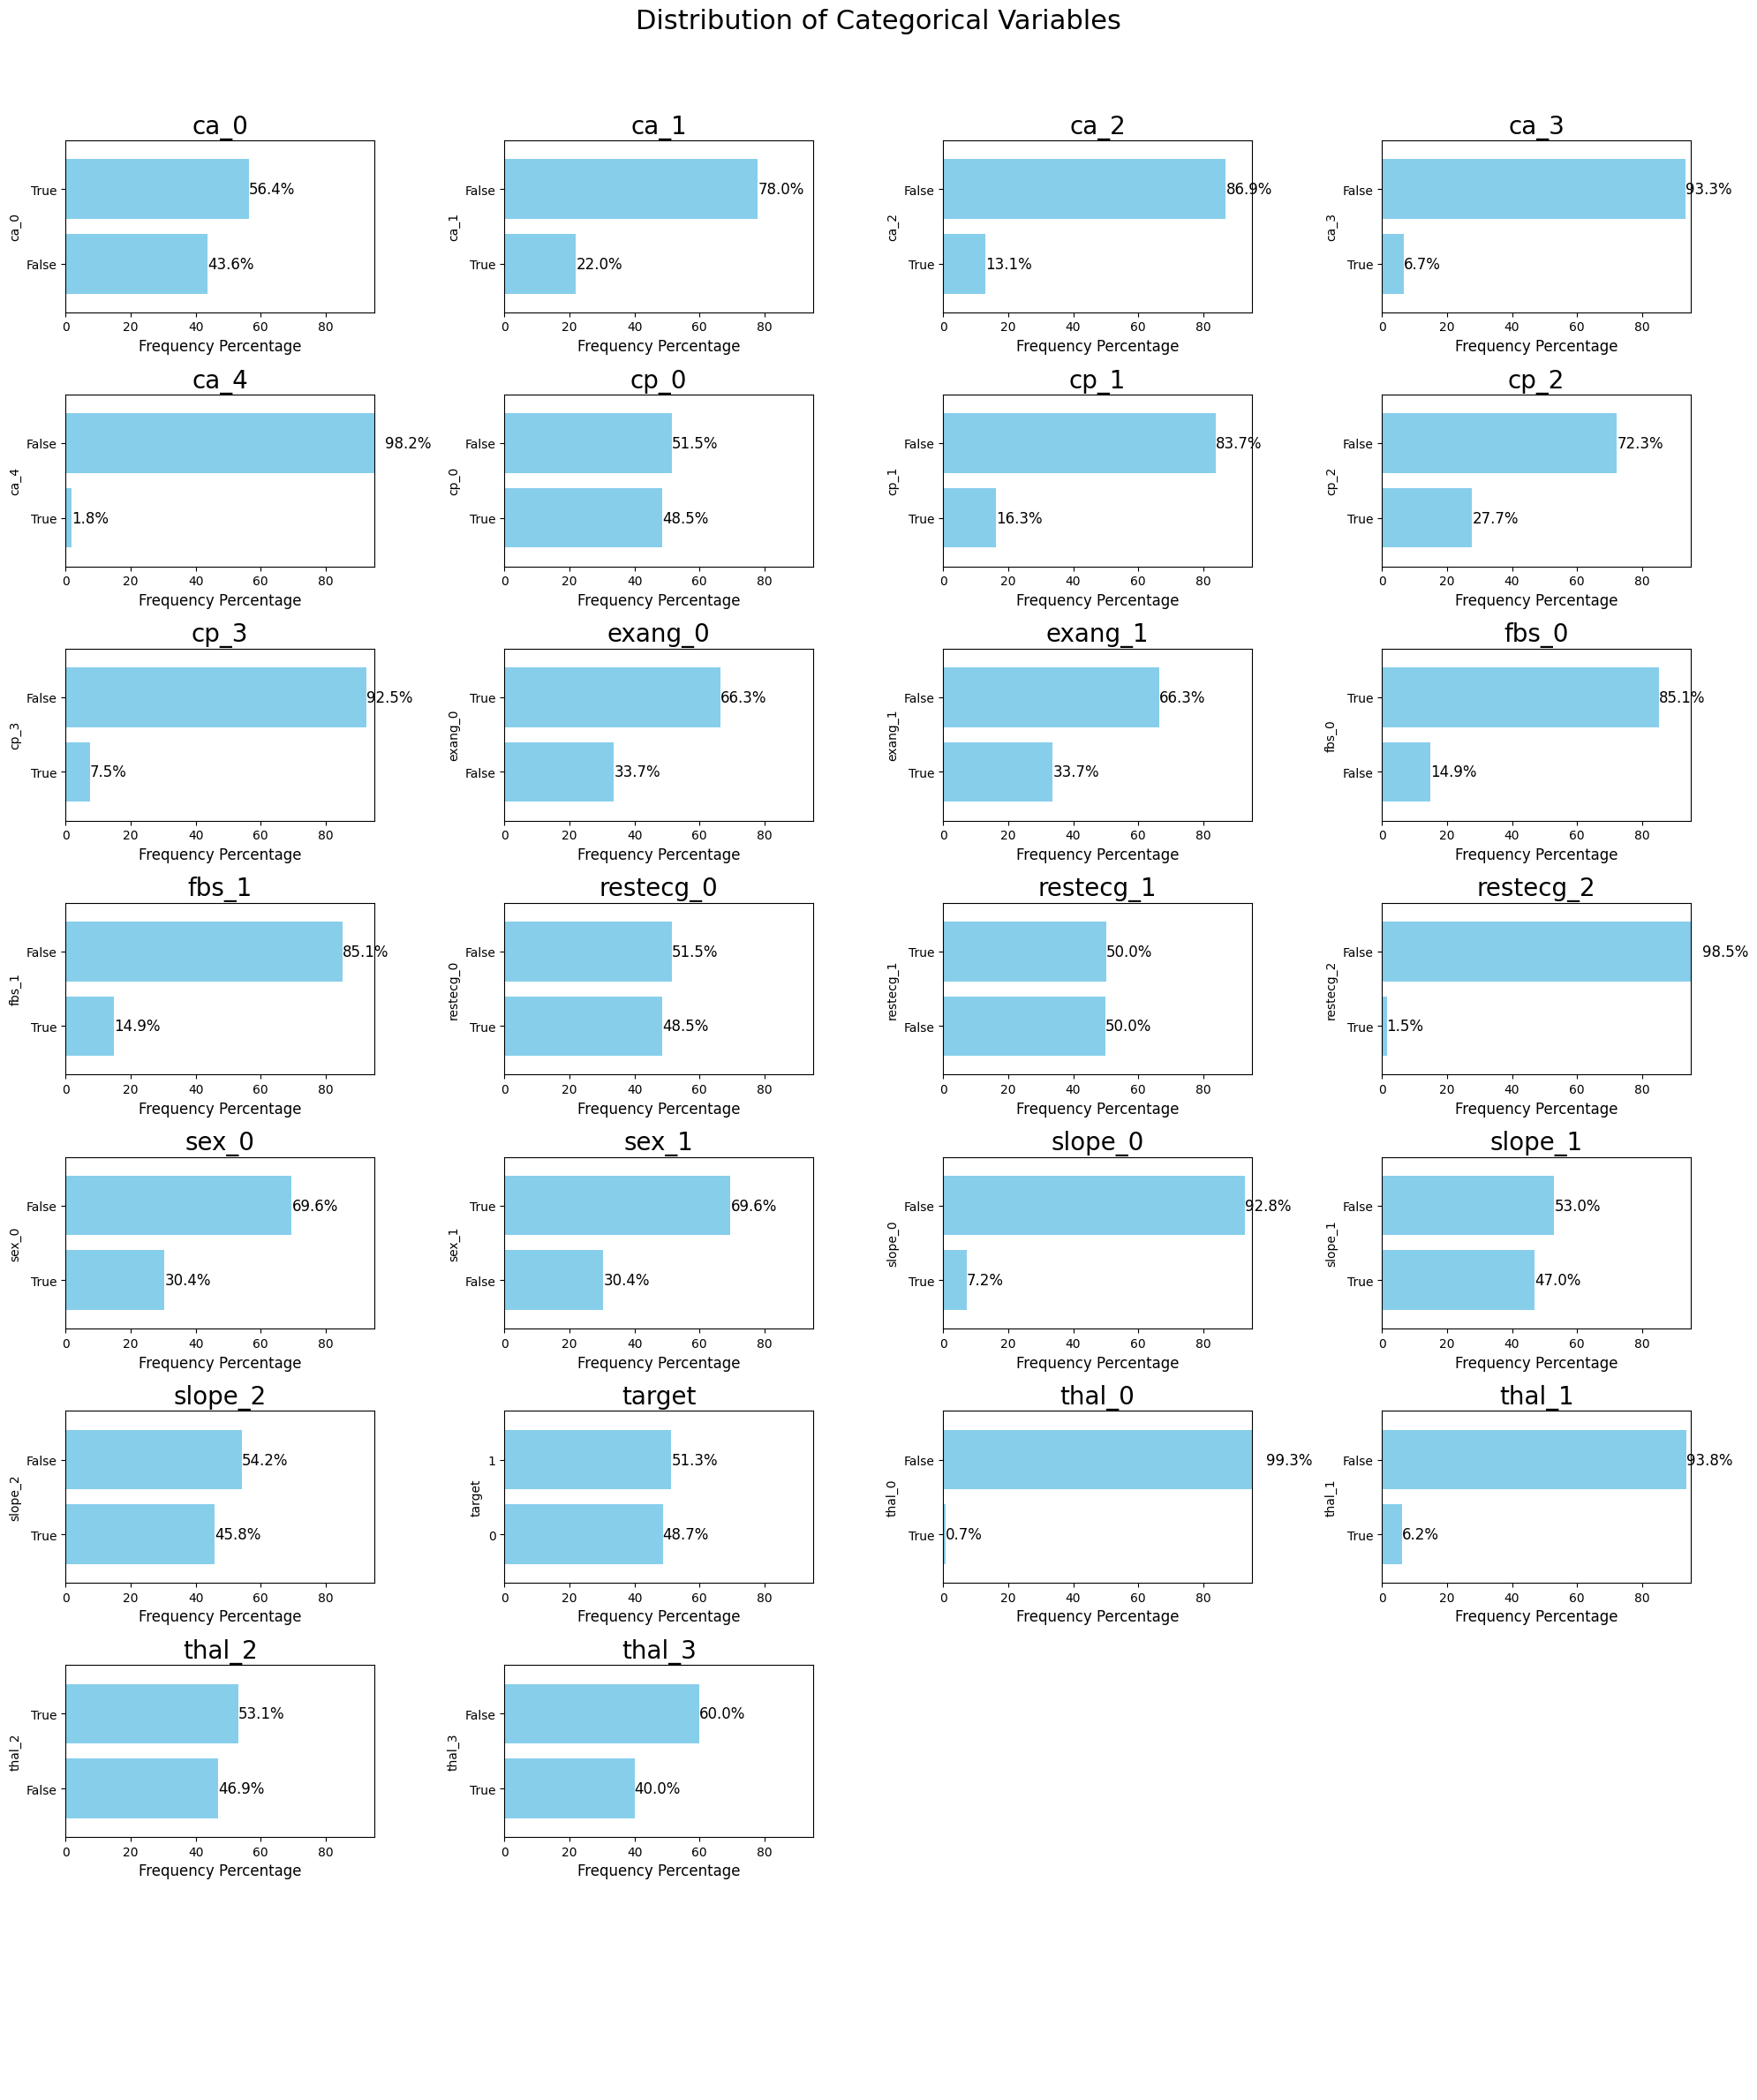

In [111]:
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(20, 25))

# Loop to plot bar charts for each categorical feature in the layout
for i, col in enumerate(categorical_features):
    row = i // 4
    col_idx = i % 4
    
    # Print statement to check the feature being processed
    print(f"Processing feature: {col}")
    
    # Calculate frequency percentages
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart if there's a subplot available
    if row < 8 and col_idx < 4:
        value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='skyblue')
        
        # Add frequency percentages to the bars
        for index, value in enumerate(value_counts):
            ax[row, col_idx].text(value, index, f'{value:.1f}%', fontsize=12, ha='left', va='center')
        
        ax[row, col_idx].set_xlim([0, 95])
        ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
        
        # Print statement to check the title being set
        print(f"Setting title for subplot: {col}")
        ax[row, col_idx].set_title(f'{col}', fontsize=20)  # Title assignment here

# Hide the empty subplots
for i in range(len(categorical_features), 8*4):
    row = i // 4
    col_idx = i % 4
    ax[row, col_idx].axis('off')

# Add the main title
plt.suptitle('Distribution of Categorical Variables', fontsize=22)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(top=0.92)
plt.show()


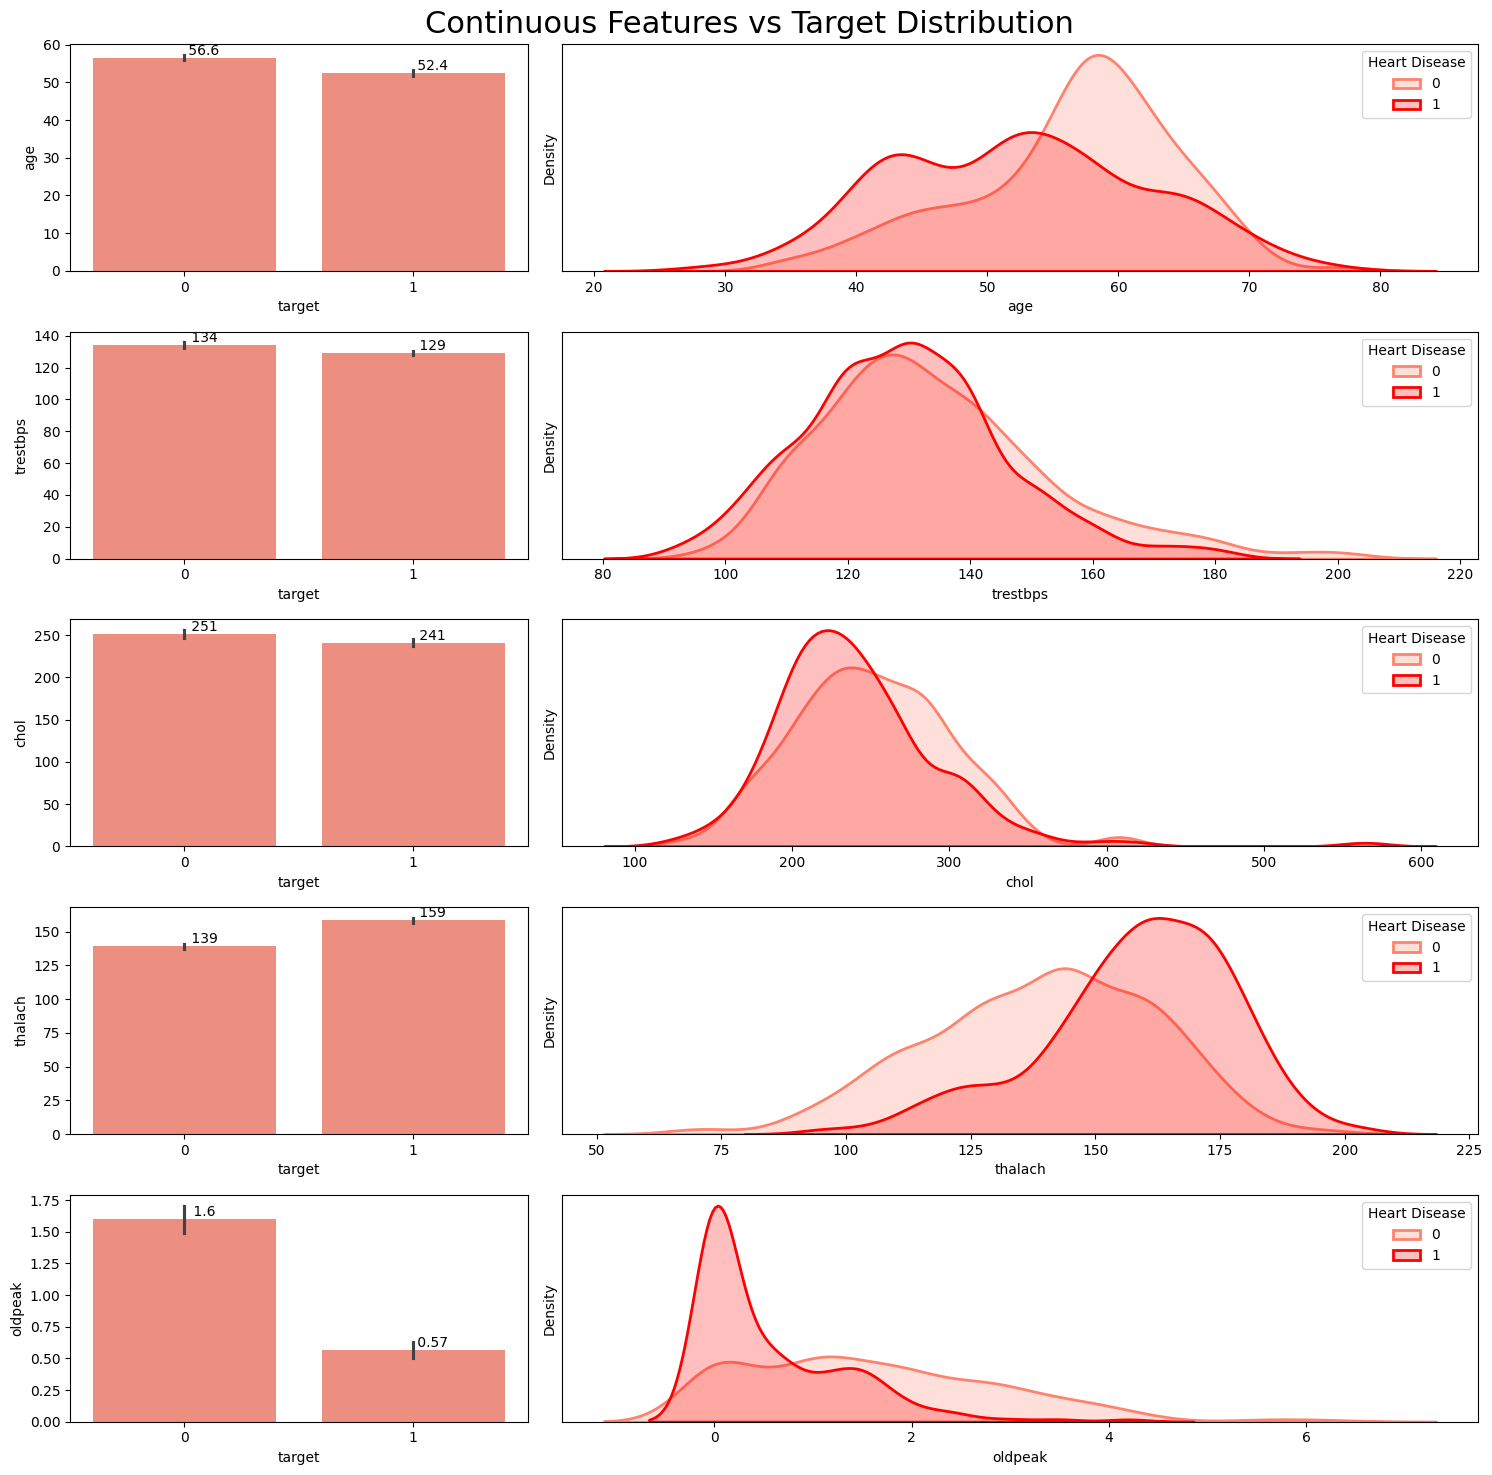

In [112]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=data, x="target", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=data[data["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=data[data["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()


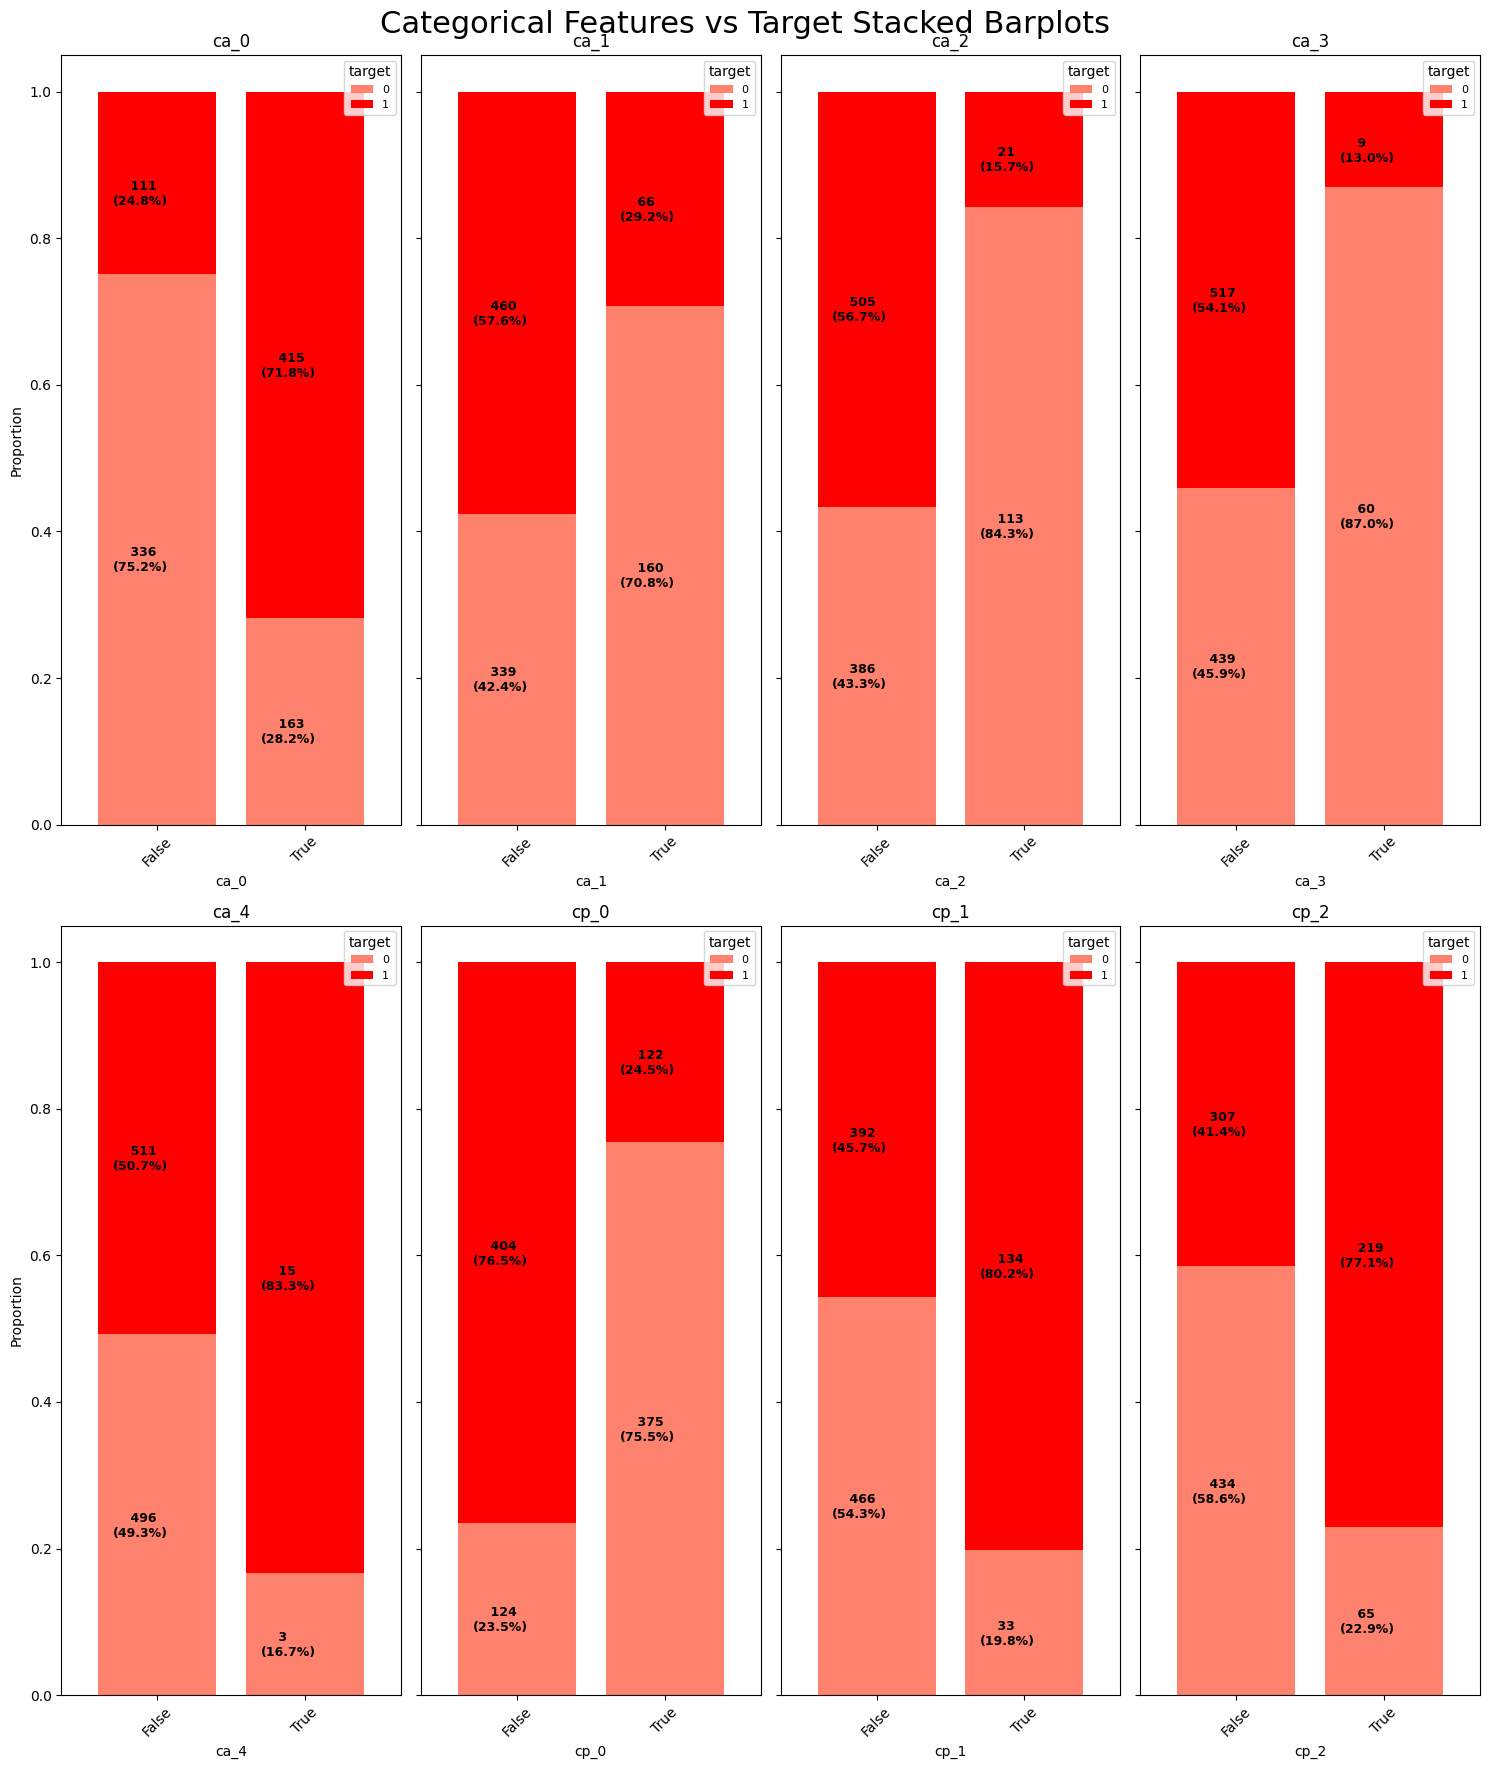

In [113]:
df = data
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 18))  # Increase the figure size for better visibility

num_features = len(categorical_features)
num_subplots = min(num_features, 8)  # Set the number of subplots to be created, maximum 8

for i in range(num_subplots):  # Loop over the range of subplots
    col = categorical_features[i]  # Get the ith categorical feature
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar charts
    x, y = i // 4, i % 4
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            if count > 0:  # Display text only if count is greater than 0
                ax[x, y].text(x=idx - 0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                              s=f'    {count}\n({round(proportion * 100, 1)}%)',
                              color="black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x, y].legend(title='target', loc='upper right', fontsize=8, ncol=1)
    # Rotate xticks
    ax[x, y].tick_params(axis='x', rotation=45)
    # Set title for each subplot
    ax[x, y].set_title(col)
    
# Adjust layout
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()


In [114]:
#We will test some classification algorithms: Logistic regression, svm, stochastic gradient descent , decision tree, random forest.

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y = data['target']

X = data.drop('target',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
LR_classifier = LogisticRegression(random_state=0)
clf = svm.SVC()
sgd=SGDClassifier()
forest=RandomForestClassifier(n_estimators=20, random_state=12,max_depth=6)
treee = tree.DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
LR_classifier.fit(X_train, y_train)
clf.fit(X_train, y_train)
sgd.fit(X_train, y_train)
treee.fit(X_train, y_train)
forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=20, random_state=12)

In [116]:
print(forest)

RandomForestClassifier(max_depth=6, n_estimators=20, random_state=12)


In [117]:
models = {'Logistic Regression': LR_classifier,
          'SVM': clf,
          'Stochastic Gradient Descent': sgd,
          'Decision Tree': treee,
          'Random Forest': forest}

train_accuracies = {}
test_accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracies[name] = accuracy_score(y_train, model.predict(X_train))
    test_accuracies[name] = accuracy_score(y_test, model.predict(X_test))


In [118]:
#traing accuracy
y_pred=LR_classifier.predict(X_train)
y_predsvm=clf.predict(X_train)
y_predsgd=sgd.predict(X_train)
y_predtree=treee.predict(X_train)
y_predforest=forest.predict(X_train)

In [119]:
print(accuracy_score(y_train, y_pred))
print(accuracy_score(y_train, y_predsvm))
print(accuracy_score(y_train, y_predsgd))
print(accuracy_score(y_train, y_predtree))
print(accuracy_score(y_train, y_predforest))

0.8661087866108786
0.691771269177127
0.6666666666666666
0.9497907949790795
0.9525801952580195


In [120]:
#test accuracy
y_pred=LR_classifier.predict(X_test)
y_predsvm=clf.predict(X_test)
y_predsgd=sgd.predict(X_test)
y_predtree=treee.predict(X_test)
y_predforest=forest.predict(X_test)

In [121]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_predsvm))
print(accuracy_score(y_test, y_predsgd))
print(accuracy_score(y_test, y_predtree))
print(accuracy_score(y_test, y_predforest))

0.8928571428571429
0.75
0.6623376623376623
0.9188311688311688
0.961038961038961


In [122]:
# Dictionary to store accuracy, precision, recall, and F1 score for each model
metrics = {'Accuracy': {}, 'Precision': {}, 'Recall': {}, 'F1 Score': {}}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    train_precision = precision_score(y_train, train_pred)
    test_precision = precision_score(y_test, test_pred)
    
    train_recall = recall_score(y_train, train_pred)
    test_recall = recall_score(y_test, test_pred)
    
    train_f1 = f1_score(y_train, train_pred)
    test_f1 = f1_score(y_test, test_pred)
    
    # Store metrics in dictionary
    metrics['Accuracy'][name] = (train_accuracy, test_accuracy)
    metrics['Precision'][name] = (train_precision, test_precision)
    metrics['Recall'][name] = (train_recall, test_recall)
    metrics['F1 Score'][name] = (train_f1, test_f1)

# Displaying all metrics
for metric_name, metric_values in metrics.items():
    print(f"{metric_name}:")
    for model_name, (train_value, test_value) in metric_values.items():
        print(f"  {model_name}: Train={train_value:.3f}, Test={test_value:.3f}")

Accuracy:
  Logistic Regression: Train=0.866, Test=0.893
  SVM: Train=0.692, Test=0.750
  Stochastic Gradient Descent: Train=0.643, Test=0.630
  Decision Tree: Train=0.950, Test=0.919
  Random Forest: Train=0.953, Test=0.961
Precision:
  Logistic Regression: Train=0.860, Test=0.887
  SVM: Train=0.681, Test=0.750
  Stochastic Gradient Descent: Train=0.908, Test=0.915
  Decision Tree: Train=0.958, Test=0.954
  Random Forest: Train=0.939, Test=0.952
Recall:
  Logistic Regression: Train=0.879, Test=0.914
  SVM: Train=0.736, Test=0.791
  Stochastic Gradient Descent: Train=0.328, Test=0.331
  Decision Tree: Train=0.942, Test=0.890
  Random Forest: Train=0.970, Test=0.975
F1 Score:
  Logistic Regression: Train=0.869, Test=0.900
  SVM: Train=0.707, Test=0.770
  Stochastic Gradient Descent: Train=0.482, Test=0.486
  Decision Tree: Train=0.950, Test=0.921
  Random Forest: Train=0.954, Test=0.964


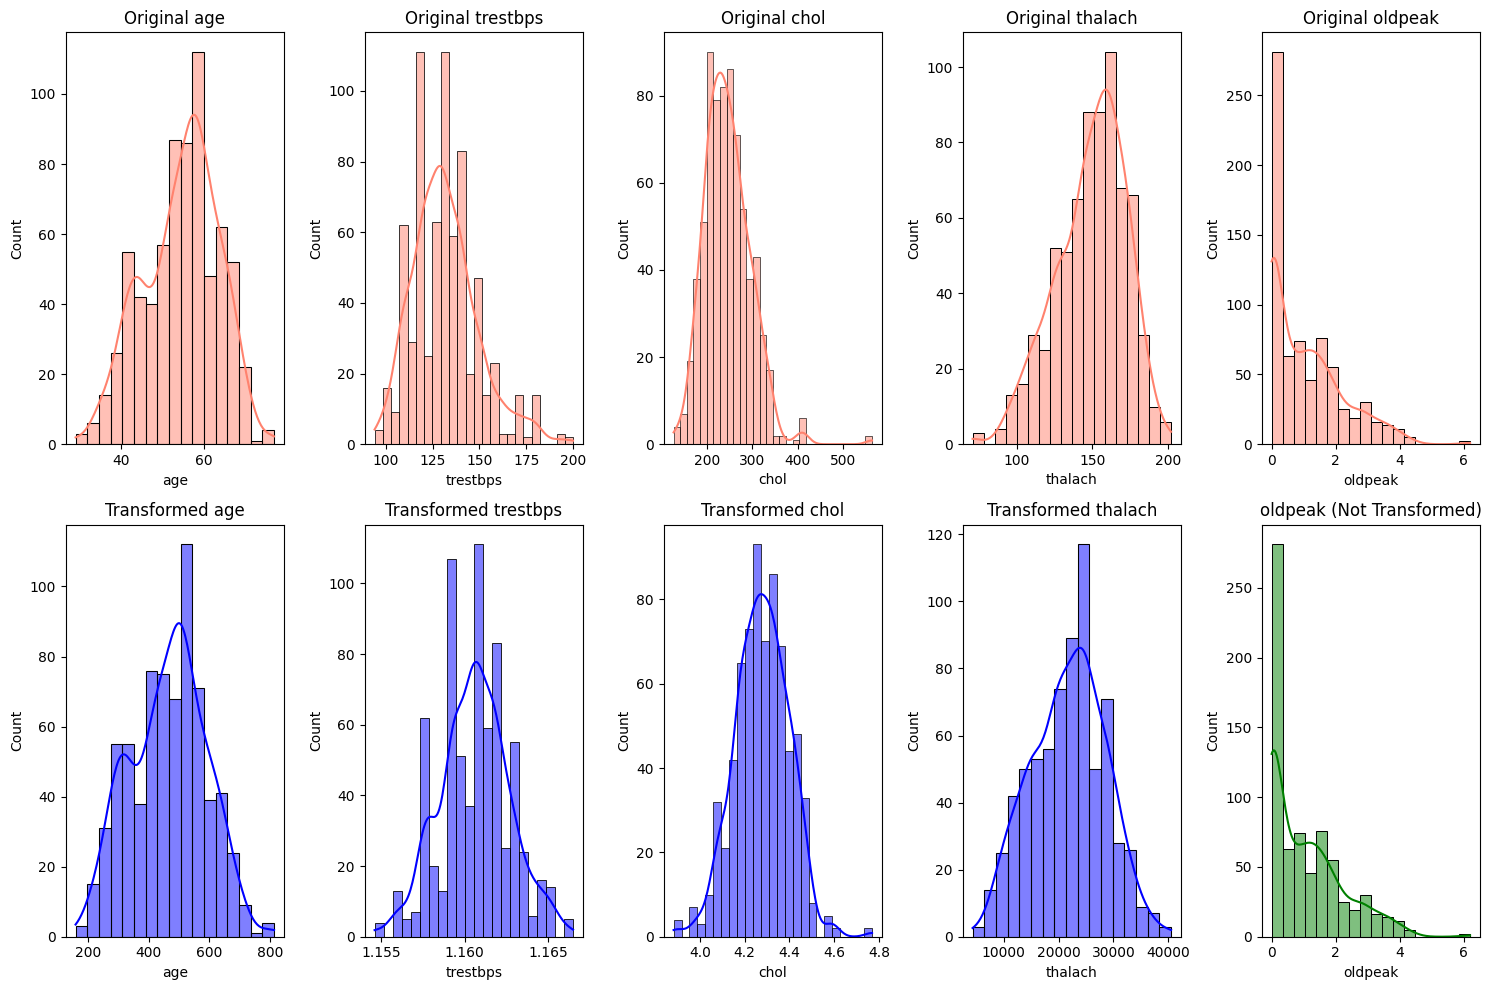

In [123]:
# Checking the distribution of the continuous features
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Original Distributions
for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')
    

# Applying Box-Cox Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(continuous_features):
    # Only apply box-cox for positive values
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col]) 
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='blue').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

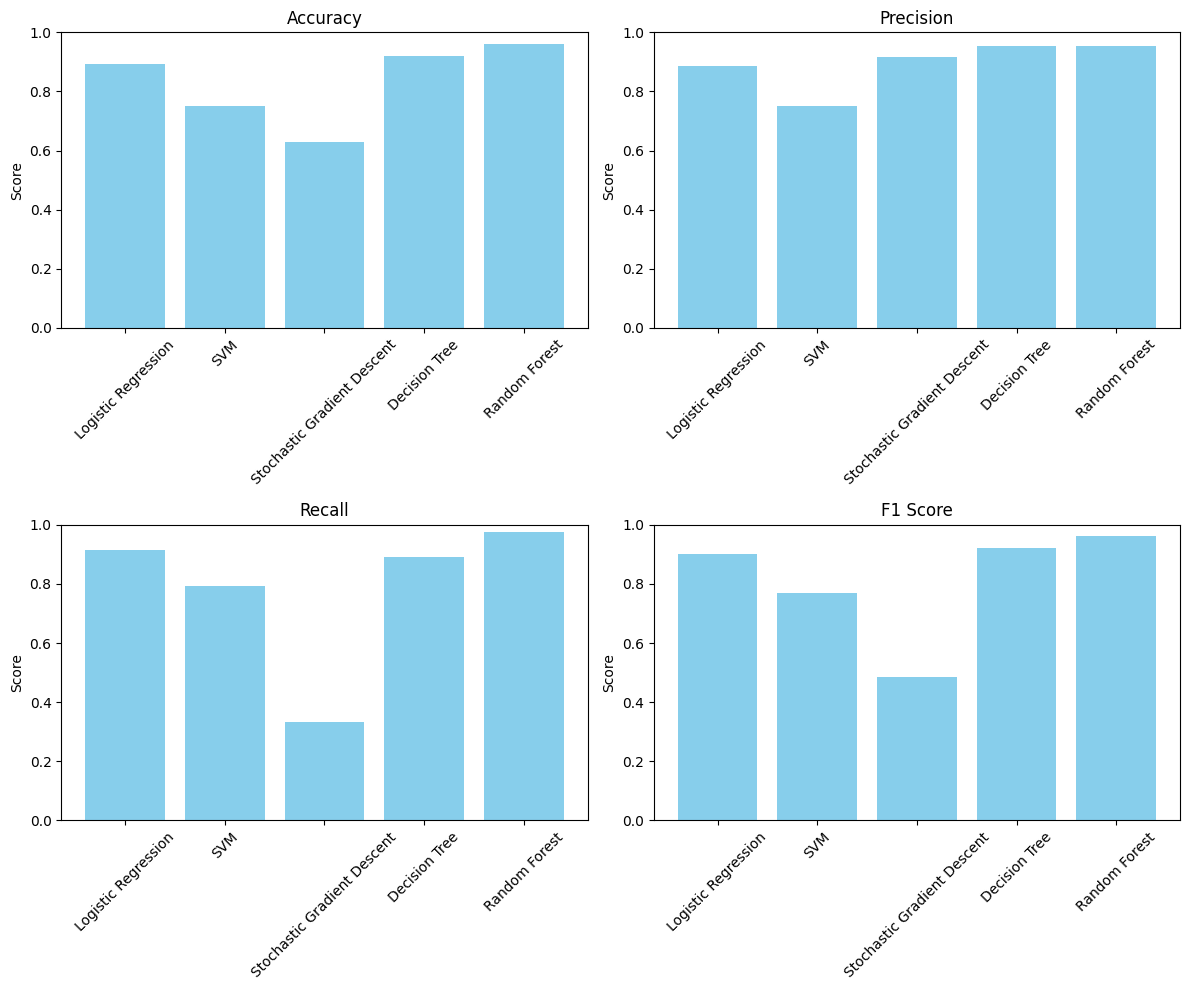

In [124]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric_name in enumerate(metrics_names):
    ax = axes[i // 2, i % 2]
    ax.bar(metrics[metric_name].keys(), [value[1] for value in metrics[metric_name].values()], color='skyblue')
    ax.set_title(metric_name)
    ax.set_ylabel('Score')
    ax.set_xticklabels(metrics[metric_name].keys(), rotation=45)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

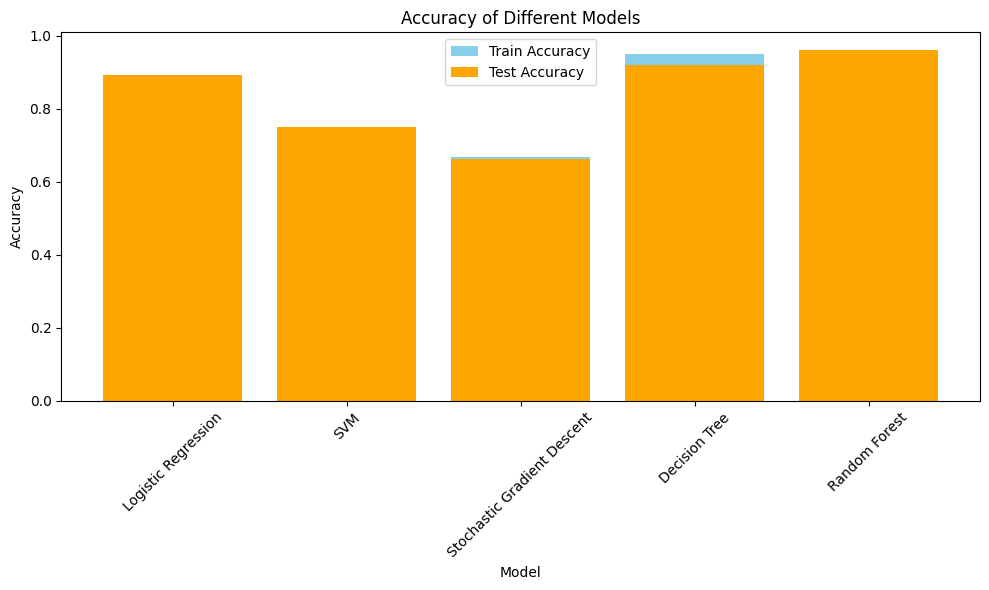

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(train_accuracies.keys(), train_accuracies.values(), label='Train Accuracy', color='skyblue')
plt.bar(test_accuracies.keys(), test_accuracies.values(), label='Test Accuracy', color='orange')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [126]:
#best model is randomForest

In [127]:
import pickle
pickle.dump(forest, open('Random_forest_model.pkl', 'wb'))

In [128]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
